In [57]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv(r"titanic_train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.shape

(891, 12)

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot: xlabel='Survived', ylabel='count'>

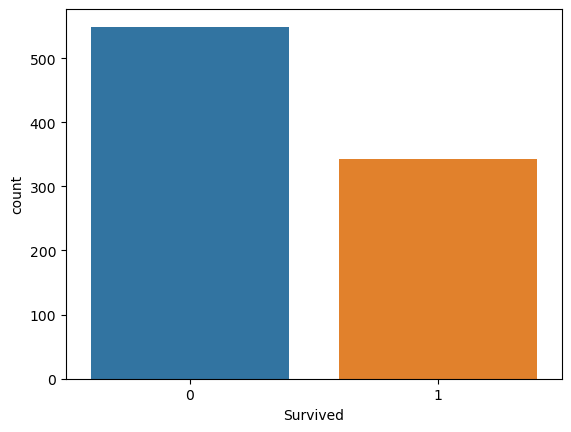

In [9]:
sns.countplot(x="Survived", data=df)

<AxesSubplot: xlabel='Survived', ylabel='count'>

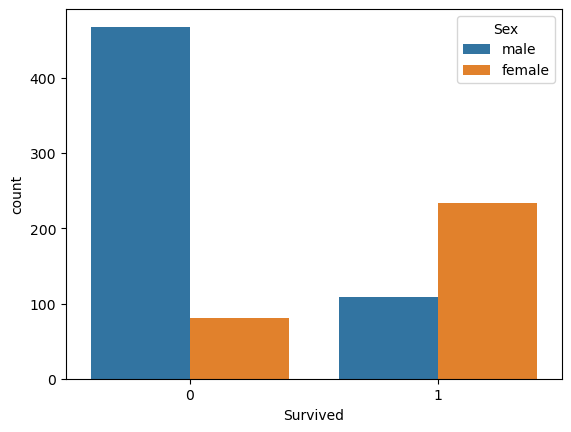

In [10]:
sns.countplot(x="Survived", hue="Sex", data=df)

<AxesSubplot: xlabel='Survived', ylabel='count'>

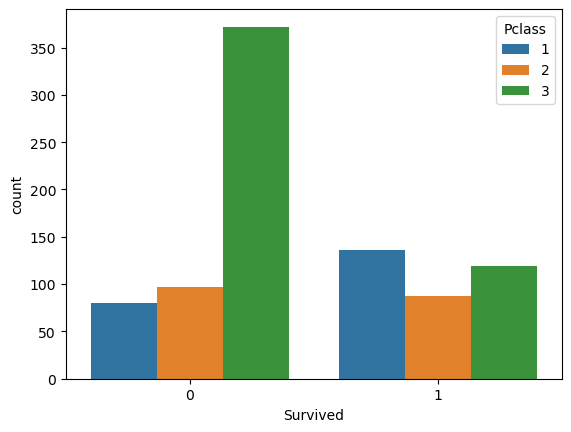

In [11]:
sns.countplot(x="Survived", hue="Pclass", data=df)

<AxesSubplot: ylabel='Frequency'>

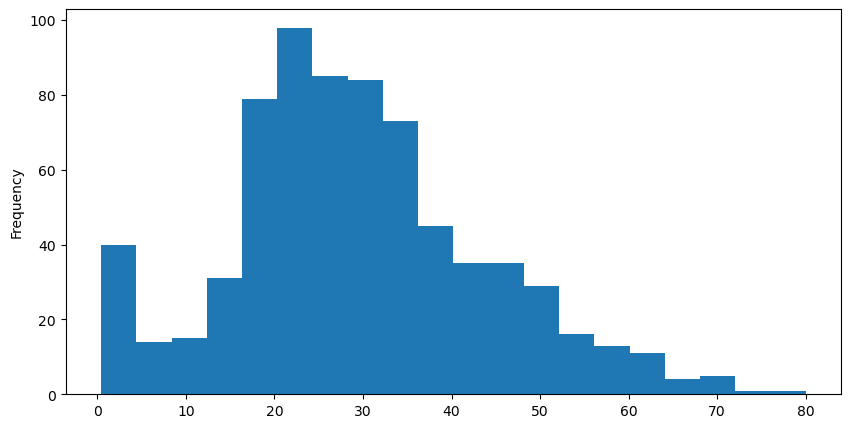

In [12]:
df["Age"].plot.hist(bins=20, figsize=(10,5))

<AxesSubplot: ylabel='Frequency'>

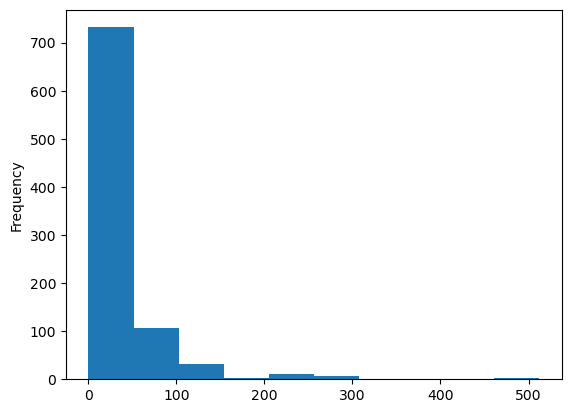

In [13]:
df["Fare"].plot.hist()

<AxesSubplot: ylabel='Frequency'>

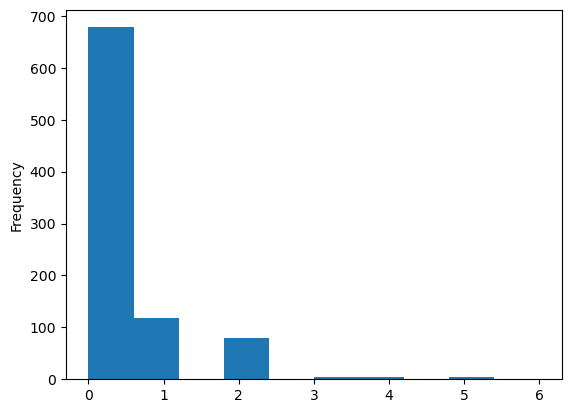

In [14]:
df["Parch"].plot.hist()

<AxesSubplot: xlabel='Parch', ylabel='count'>

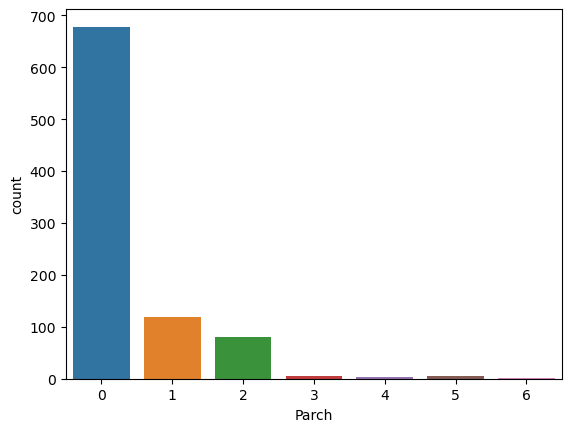

In [15]:
sns.countplot(x="Parch", data=df)

<AxesSubplot: xlabel='SibSp', ylabel='count'>

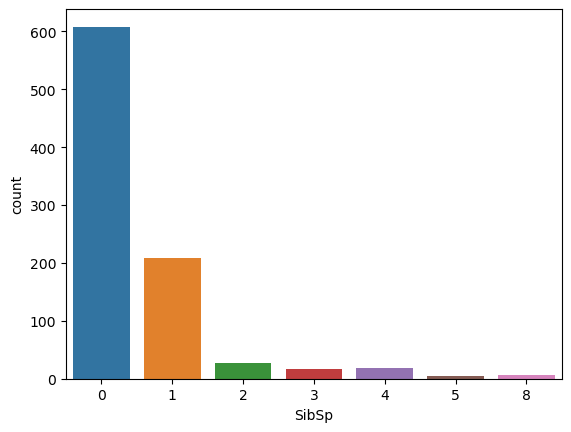

In [16]:
sns.countplot(x="SibSp", data=df)

In [17]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
df=df.drop(columns='Cabin', axis=1)

In [19]:
df['Age'].fillna(df['Age'].mean(), inplace=True)


In [20]:
print(df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [21]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<AxesSubplot: >

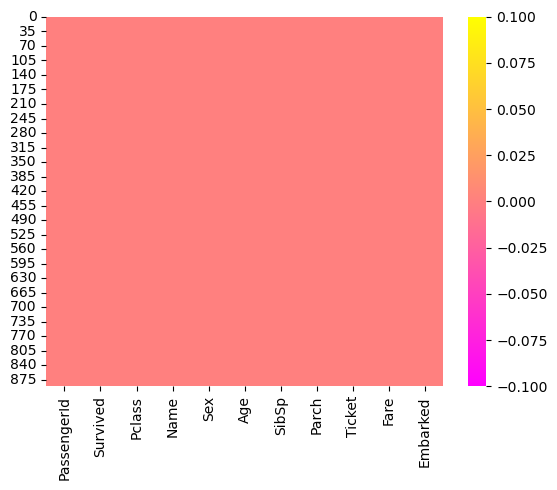

In [22]:
sns.heatmap(df.isnull(), cmap='spring')

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

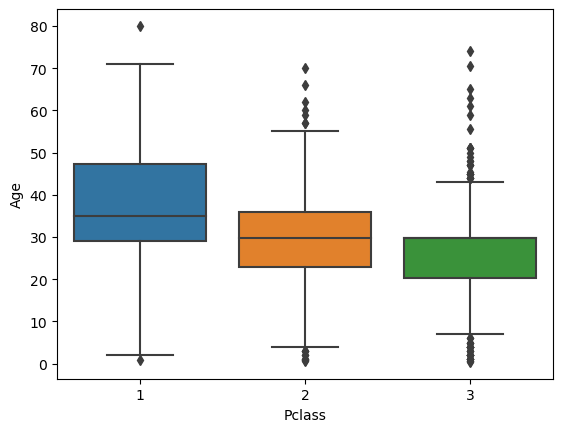

In [23]:
sns.boxplot(x='Pclass', y='Age', data=df)

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [25]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


<AxesSubplot: >

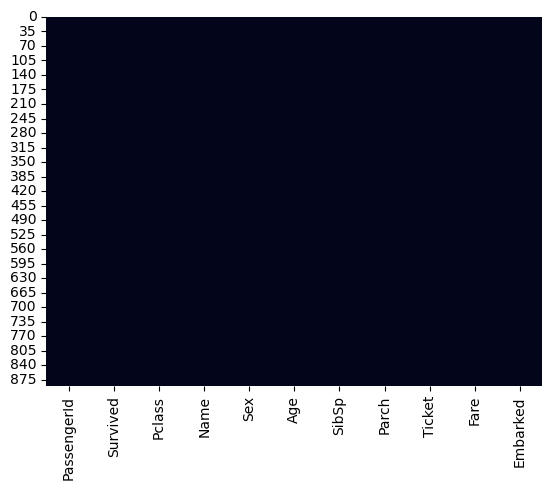

In [26]:
sns.heatmap(df.isnull(), cbar=False)

In [27]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [28]:
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [29]:
#df= df.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)


In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [31]:
X = df.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = df['Survived']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)
X_train.columns=X_train.columns.astype(str)
X_test.columns=X_train.columns.astype(str)

In [38]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

In [39]:
model.fit(X_train, Y_train)

C:\Users\Admin\anaconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
test_prediction=model.predict(X_test)

In [45]:
from sklearn.metrics import classification_report

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
confusion_matrix(Y_test, prediction)

array([[91,  9],
       [30, 49]], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score

In [51]:
test_data_accuracy=accuracy_score(Y_test, prediction)

In [52]:
print('Accuracy score of test data : ', test_data_accuracy)


Accuracy score of test data :  0.7821229050279329


In [53]:
train_prediction=model.predict(X_train)

In [54]:
training_data_accuracy = accuracy_score(Y_train, train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)


Accuracy score of training data :  0.8075842696629213


In [55]:
input_data = (3,0,35,0,0,8.05,0)

In [58]:
input_data_as_numpy_array = np.asarray(input_data)

In [59]:
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


In [64]:
prediction = model.predict(input_data_reshaped)
print(prediction)
if prediction[0]==0:
    print("Dead")
if prediction[0]==1:
    print("Alive")

[0]
Dead


C:\Users\Admin\anaconda3\envs\py38\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
